In [47]:
import pandas as pd
import numpy as np
import pickle

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

#preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#ML libraries
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



#Misc libraries
import warnings
warnings.filterwarnings("ignore")


In [16]:
data = pd.read_csv('sample2.csv')

In [17]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [18]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
data_pivot1=pd.pivot_table(data,index=["type"],
                               values=['amount','isFraud','isFlaggedFraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
data_pivot1.style.background_gradient(cmap=cm)

In [20]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,243.524580,1.802593e+05,8.405440e+05,8.623184e+05,1.092142e+06,1.217457e+06,0.001400,0.000020
std,142.989564,5.394901e+05,2.905490e+06,2.940672e+06,3.123411e+06,3.349252e+06,0.037391,0.004472
min,1.000000,9.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.358008e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.568036e+04,1.384450e+04,0.000000e+00,1.432386e+05,2.210873e+05,0.000000,0.000000
75%,335.000000,2.092434e+05,1.070732e+05,1.471921e+05,9.639589e+05,1.129805e+06,0.000000,0.000000
max,736.000000,3.697390e+07,3.359321e+07,3.374855e+07,1.540135e+08,1.542411e+08,1.000000,1.000000


In [21]:
data2 = data.drop(['step'],  axis=1)

In [22]:
fig = px.box(data2, y="amount")
fig.show()

In [23]:


labels = list(data2['type'].value_counts().index)
values = list(data2['type'].value_counts().values)

fig = go.Figure(data=[go.Bar(x=labels, y=values)])
fig.show()


In [24]:
data2

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
1,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
2,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
3,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
4,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...
49995,PAYMENT,43675.82,C1782723064,0.00,0.00,M11629473,0.00,0.00,0,0
49996,CASH_OUT,161639.72,C78683855,5579.00,0.00,C1595714382,0.00,161639.72,0,0
49997,PAYMENT,6043.60,C1416720725,92825.74,86782.14,M1744355995,0.00,0.00,0,0
49998,CASH_OUT,105978.55,C2013621784,29984.00,0.00,C1173715119,0.00,105978.55,0,0


In [25]:
data2[data2['isFraud'] == 1]['amount'].describe()

count    7.000000e+01
mean     1.413000e+06
std      2.352488e+06
min      7.360150e+03
25%      1.511107e+05
50%      5.640288e+05
75%      1.459703e+06
max      1.000000e+07
Name: amount, dtype: float64

In [26]:
amt_type = data2.groupby('type')['amount'].mean().reset_index()

In [27]:
fig= px.bar(amt_type, x='type', y='amount')
fig.show()

In [28]:
data2.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [29]:
data3=data2.drop([ "isFlaggedFraud"], axis=1)

In [30]:
data3.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [31]:
#Tallying the balance
def balance_diff(data3):
    '''balance_diff checks whether the money debited from sender has exactly credited to the receiver
       then it creates a new column which indicates 1 when there is a deviation else 0'''
    #Sender's balance
    orig_change=data3['newbalanceOrig']-data3['oldbalanceOrg']
    orig_change=orig_change.astype(int)
    for i in orig_change:
        if i<0:
            data3['orig_txn_diff']=round(data3['amount']+orig_change,2)
        else:
            data3['orig_txn_diff']=round(data3['amount']-orig_change,2)
    data3['orig_txn_diff']=data3['orig_txn_diff'].astype(int)
    data3['orig_diff'] = [1 if n !=0 else 0 for n in data3['orig_txn_diff']] 
    
    #Receiver's balance
    dest_change=data3['newbalanceDest']-data3['oldbalanceDest']
    dest_change=dest_change.astype(int)
    for i in dest_change:
        if i<0:
            data3['dest_txn_diff']=round(data3['amount']+dest_change,2)
        else:
            data3['dest_txn_diff']=round(data3['amount']-dest_change,2)
    data3['dest_txn_diff']=data3['dest_txn_diff'].astype(int)
    data3['dest_diff'] = [1 if n !=0 else 0 for n in data3['dest_txn_diff']] 
    
    data3.drop(['orig_txn_diff','dest_txn_diff'],axis=1,inplace = True)
    
#Surge indicator
def surge_indicator(data3):
    '''Creates a new column which has 1 if the transaction amount is greater than the threshold
    else it will be 0'''
    data3['surge']=[1 if n>450000 else 0 for n in data3['amount']]

#Frequency indicator
def frequency_receiver(data3):
    '''Creates a new column which has 1 if the receiver receives money from many individuals
    else it will be 0'''
    data3['freq_dest'] = data3['nameDest'].map(data3['nameDest'].value_counts())
    data3['freq_dest'] = data3['freq_dest'].apply(lambda x: 1 if x > 20 else 0)

#Tracking the receiver as merchant or not
def merchant(data3):
    '''We also have customer ids which starts with M in Receiver name, it indicates merchant
    this function will flag if there is a merchant in receiver end '''
    values = ['M']
    conditions = list(map(data3['nameDest'].str.contains, values))
    data3['merchant'] = np.select(conditions, '1', '0')

In [32]:
balance_diff(data3)

data3['orig_diff'].value_counts()
data3['dest_diff'].value_counts()

dest_diff
1    30116
0    19884
Name: count, dtype: int64

In [33]:
surge_indicator(data3)
data3['surge'].value_counts()

surge
0    46683
1     3317
Name: count, dtype: int64

In [34]:
frequency_receiver(data3)
data3['freq_dest'].value_counts()

freq_dest
0    50000
Name: count, dtype: int64

In [35]:
max_size = data3['isFraud'].value_counts().max()

#Balancing the target label
lst = [data3]
for class_index, group in data3.groupby('isFraud'):
    lst.append(group.sample(max_size-len(group), replace=True))
best = pd.concat(lst)

In [36]:
data3.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,orig_diff,dest_diff,surge,freq_dest
0,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,1,0,0
1,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,1,1,0,0
2,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,1,0,0
3,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,1,0,1,0
4,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,1,0,0


In [37]:
fig = go.Figure(data=[go.Pie(labels=['Not Fraud', 'Fraud'], values=best['isFraud'].value_counts())])
fig.show()

In [38]:
data3.head(300)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,orig_diff,dest_diff,surge,freq_dest
0,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,1,0,0
1,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,1,1,0,0
2,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,1,0,0
3,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,1,0,1,0
4,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,CASH_IN,141273.15,C80009629,24639886.52,24781159.68,C559367869,484939.60,219172.46,0,0,1,0,0
296,PAYMENT,4962.99,C1589115167,14752.00,9789.01,M1768343139,0.00,0.00,0,1,1,0,0
297,CASH_IN,242090.12,C264592116,17528542.66,17770632.78,C761150919,319311.17,77221.05,0,0,1,0,0
298,PAYMENT,1854.44,C1146107700,0.00,0.00,M1816242792,0.00,0.00,0,1,1,0,0


In [39]:
type_mapping = {'PAYMENT': 1, 'TRANSFER': 2, 'CASH_IN': 3, 'CASH_OUT': 4, 'DEBIT': 5}

# Apply the mapping to create a new 'type_numeric' column
data3['type_numeric'] = data3['type'].map(type_mapping)

# Drop the original 'type' column
data3.drop(['type'], axis=1, inplace=True)

data3.head(40)

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,orig_diff,dest_diff,surge,freq_dest,type_numeric
0,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,1,0,0,3
1,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,1,1,0,0,1
2,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,1,0,0,3
3,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,1,0,1,0,2
4,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,1,0,0,3
5,915.13,C2002954533,0.00,0.00,M290849763,0.00,0.00,0,1,1,0,0,1
6,20603.87,C813757373,0.00,0.00,C823291717,558068.66,578672.53,0,1,0,0,0,4
7,58605.72,C1850864812,0.00,0.00,C618657299,585494.94,644100.66,0,1,0,0,0,4
8,4865.11,C886849972,0.00,0.00,M623175144,0.00,0.00,0,1,1,0,0,1
9,118131.63,C390714641,0.00,0.00,C366360355,8131691.35,8476246.86,0,1,1,0,0,4


In [40]:
#Splitting dependent and independent variable
data4=data3.copy()
X = data4.drop(['isFraud'], axis=1)
y=data4['isFraud']



In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
# Train-test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7, random_state=111)

#Standardizing the numerical columns
col_names=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
features_train = X_train[col_names]
features_test = X_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)
X_train[col_names] = features_train
X_test[col_names] =features_test

In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [44]:
#Tokenzation of customer name to get a unique id
tokenizer_org = tf.keras.preprocessing.text.Tokenizer()
tokenizer_org.fit_on_texts(X_train['nameOrig'])

tokenizer_dest = tf.keras.preprocessing.text.Tokenizer()
tokenizer_dest.fit_on_texts(X_train['nameDest'])

# Create tokenized customer lists
customers_train_org = tokenizer_org.texts_to_sequences(X_train['nameOrig'])
customers_test_org = tokenizer_org.texts_to_sequences(X_test['nameOrig'])

customers_train_dest = tokenizer_dest.texts_to_sequences(X_train['nameDest'])
customers_test_dest = tokenizer_dest.texts_to_sequences(X_test['nameDest'])


# Pad sequences
X_train['customers_org'] = tf.keras.preprocessing.sequence.pad_sequences(customers_train_org, maxlen=1)
X_test['customers_org'] = tf.keras.preprocessing.sequence.pad_sequences(customers_test_org, maxlen=1)

X_train['customers_dest'] = tf.keras.preprocessing.sequence.pad_sequences(customers_train_dest, maxlen=1)
X_test['customers_dest'] = tf.keras.preprocessing.sequence.pad_sequences(customers_test_dest, maxlen=1)

In [45]:
X_train=X_train.drop(['nameOrig','nameDest'],axis=1)
X_train = X_train.reset_index(drop=True)

X_test=X_test.drop(['nameOrig','nameDest'],axis=1)
X_test = X_test.reset_index(drop=True)

In [48]:
columns_used = X_train.columns.tolist()
with open('modelcolumns.pkl', 'wb') as columns_file:
    pickle.dump(columns_used, columns_file)

In [ ]:
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
svc_cv=SVC(kernel='linear',random_state=123)
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes',5:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv,rf_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X_train, y_train, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9985142857142858
Decision Tree Test Accuracy: 0.9069714285714285
KNN Test Accuracy: 0.6792857142857142
SVC Test Accuracy: 0.991
Naive Bayes Test Accuracy: 0.9927142857142858
Random Forest Test Accuracy: 0.9125428571428571


In [ ]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

lrModel_grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
lrModel_grid.fit(X_train, y_train)
print(lrModel_grid.best_estimator_)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


LogisticRegression(C=100, penalty='l1', solver='liblinear')


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


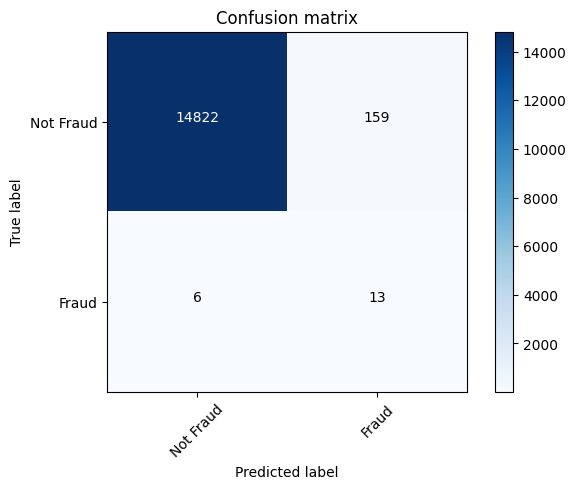

In [ ]:
y_pred=lrModel_grid.predict(X_test)

#Plotting confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Not Fraud','Fraud'])

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      0.99     14981
       Fraud       0.08      0.68      0.14        19

    accuracy                           0.99     15000
   macro avg       0.54      0.84      0.57     15000
weighted avg       1.00      0.99      0.99     15000



In [ ]:
# from sklearn.ensemble import RandomForestClassifier


In [ ]:
# algorithm2 = RandomForestClassifier()
algorithm = LogisticRegression()

In [ ]:
model = algorithm.fit(X_train, y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
accuracy2 = accuracy_score(y_test, prediction)

In [ ]:
accuracy2

0.9576666666666667

In [ ]:
X_train.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_diff,dest_diff,surge,freq_dest,type_numeric,customers_org,customers_dest
0,-0.137559,-0.289257,-0.293249,-0.114035,-0.061761,1,1,0,0,2,1,39
1,0.202741,0.624213,0.710570,0.040111,-0.086387,0,1,0,0,3,2,902
2,-0.318157,-0.289257,-0.293249,-0.352797,-0.364718,1,1,0,0,1,3,903
3,-0.271553,-0.289257,-0.293249,1.293660,1.172954,1,0,0,0,4,4,904
4,-0.081529,-0.289257,-0.293249,-0.235232,-0.215655,1,0,0,0,4,5,905


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("modelFinally.pkl", "wb"))

In [ ]:
# X_train.columns

In [ ]:
# all_data = pd.concat([X_train, X_test])
# all_labels = pd.concat([y_train, y_test])

# # Make predictions on all data
# all_predictions = model2.predict(all_data)

# # Filter out the rows where the predicted label is fraud
# fraudulent_rows = all_data[all_predictions == 1]

# # Print out the fraudulent rows
# print("Fraudulent Rows:")
# print(fraudulent_rows)